In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


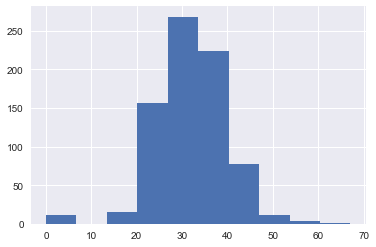

In [17]:
df['BMI'].hist()

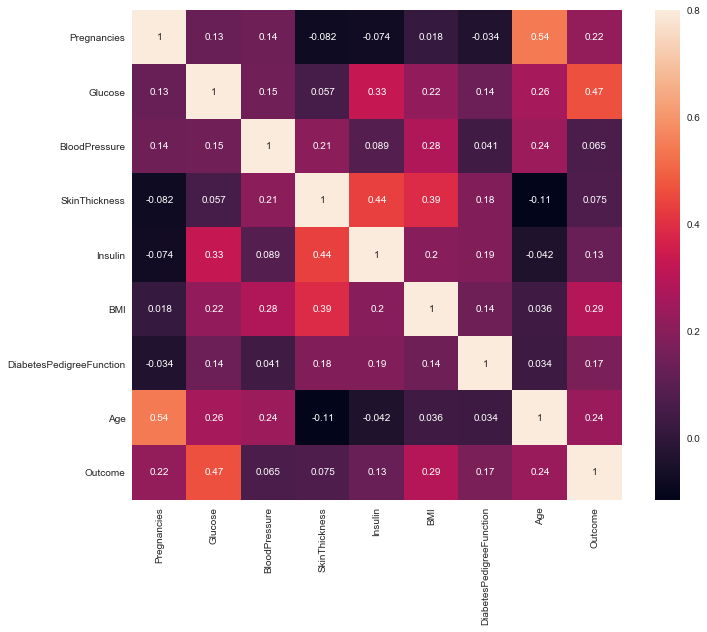

In [18]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, vmax=.8);

### Glucose, Age and BMI are the most Correlated features with the 'Outcome'
### Bloodpressure, SkinThikness have tiny Correlation with the outcome, hummm !
### Age with Pregnancies are the most Correlated features
### Insulin with Glucuse ' BIOLOGY :) "
### finnaly SkinThikness with Insulin, that's odd 


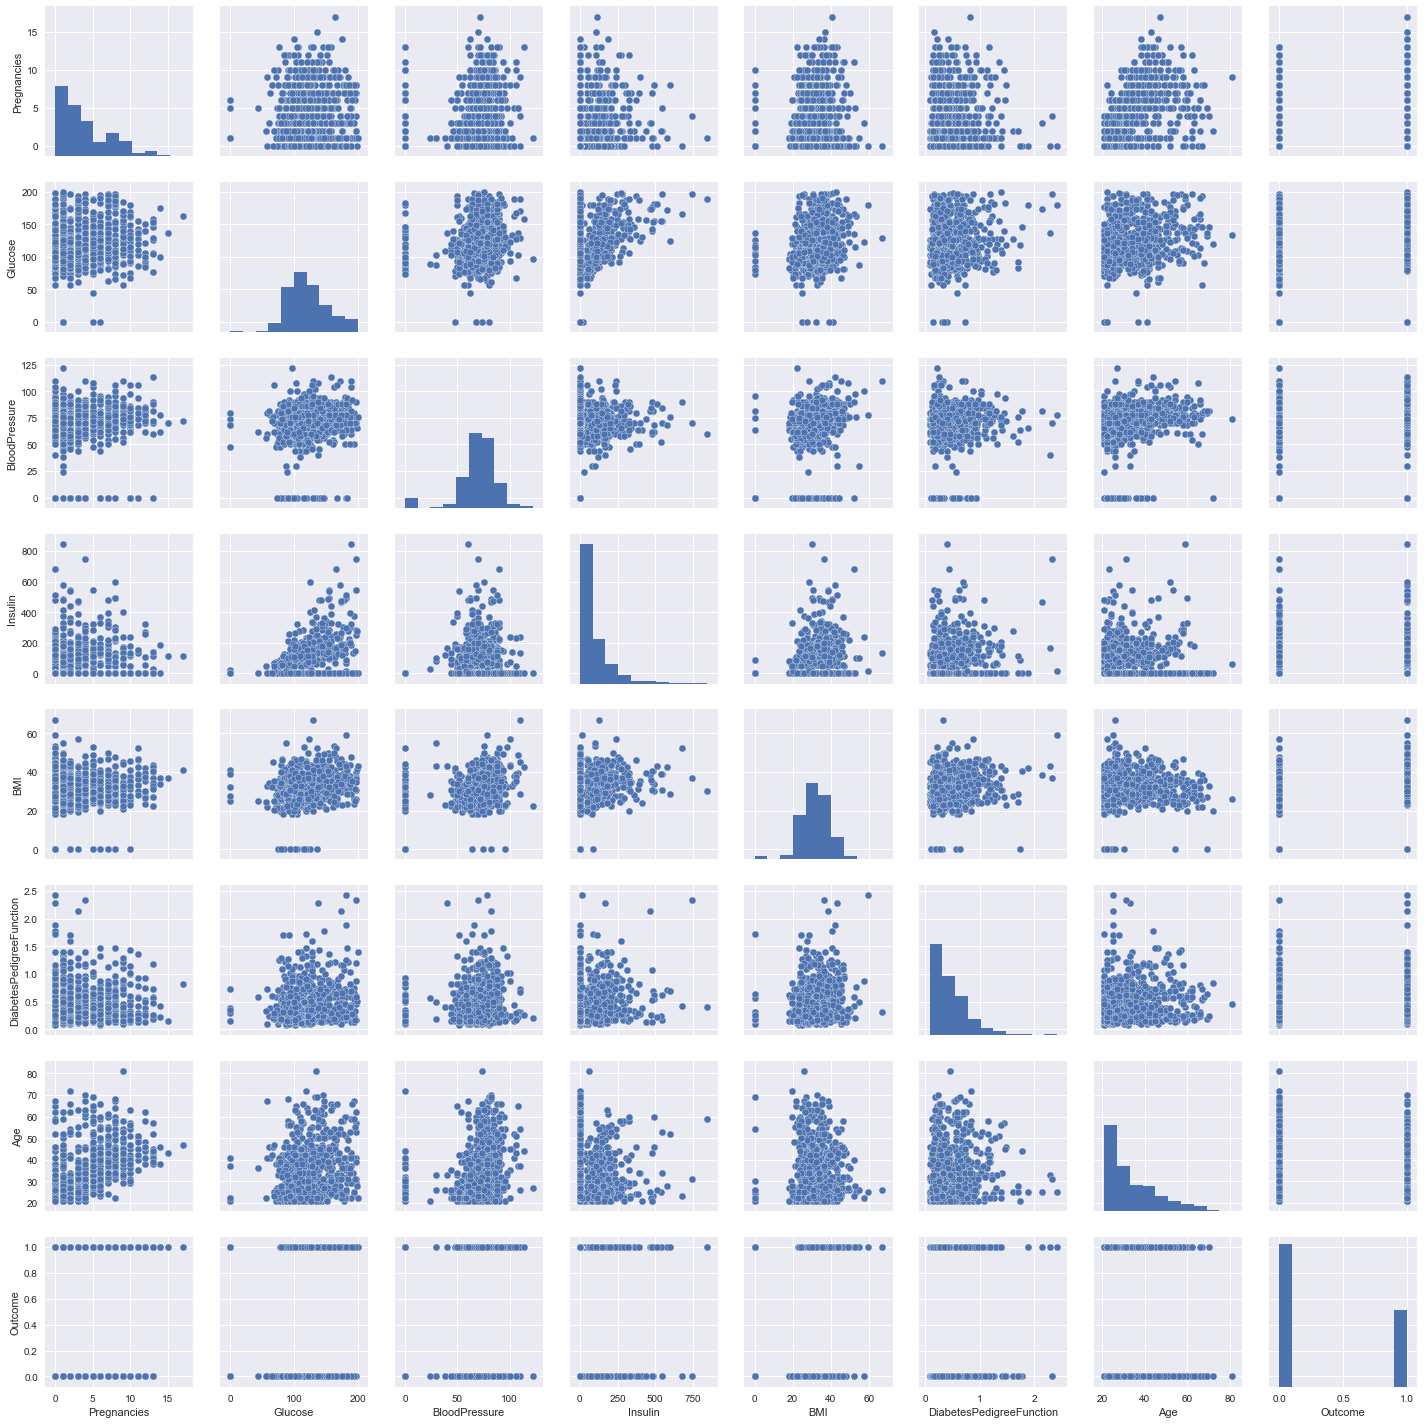

In [19]:
sns.set()
cols = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [22]:

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer,f1_score

##  LogisticRegression

In [25]:
lr = LogisticRegression()
lr.fit(X_train ,y_train )
lr.score(X_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred = lr.predict([[8,183,64,0,0,23.3,0.672,32]])
y_pred[0]

0.7782101167315175

## random forest classifier


In [38]:
rf = RandomForestClassifier( n_estimators=5)
rf.fit(X_train ,y_train )
rf.score(X_train ,y_train)

0.9630350194552529

In [39]:
y_pred = rf.predict([[8,183,64,0,0,23.3,0.672,32]])
y_pred[0]


1

## KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train ,y_train )
knn.score(X_train ,y_train)

0.8365758754863813

In [53]:
y_pred = knn.predict([[8,183,64,0,0,23.3,0.672,32]])
y_pred[0]

1

## DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier()
dt.fit(X_train ,y_train )
dt.score(X_train ,y_train)

1.0

In [27]:
y_pred = dt.predict(X_test)


In [31]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.74      0.77       168
          1       0.55      0.62      0.58        86

avg / total       0.71      0.70      0.70       254



In [ ]:
from sklearn.metrics import accuracy_score, make_scorer,f1_score
fi_score = f1_score(y_true, y_pred, average='weighted')
accuracy_score = accuracy_score(y_true, y_pred)